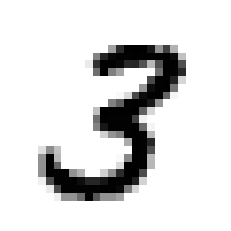

KeyError: "None of [Int64Index([249, 125, 532,  44, 176, 419, 408, 561, 140, 289,\n            ...\n            194,  80,  76, 210, 362,  54, 282, 155, 594,  27],\n           dtype='int64', length=600)] are in the [columns]"

In [1]:
# fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[361]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

x_train, x_test = x[:600], x[600:700]
y_train, y_test = y[:600], y[600:700]

shuffle_index = np.random.permutation(600)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == '2')
y_test_2 = (y_test == '2')

# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)

# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())
